In [1]:
import pandas as pd

In [2]:
file = "backup/20230301/tbl_INFRASTRUCTURES-Grid view.csv"

mhp = pd.read_csv(file)

mhp.columns

Index(['Name', 'Record ID', 'Entered by', 'Status', 'Notes', 'Description',
       'Website URL', 'Contact email', 'Email UID', 'Address', 'Town/City',
       'Postcode', 'Postcode no space', 'API URL', 'API Call', 'GPS',
       'Longitude', 'Latitude', 'University affiliation notes',
       'Direct parent (tbl_ORGANISATIONS)',
       'Direct parent ID (tbl_ORGANISATIONS)',
       'Mission group (tbl_ORGANISATIONS)',
       'TRAC peer group (tbl_ORGANISATIONS)',
       'Direct parent (tbl_INFRASTRUCTURES)',
       'Direct parent ID (tbl_INFRASTRUCTURES)',
       'Child infrastructures (tbl_INFRASTRUCTURES)',
       'Child infrastructures (tbl_UNIVERSITIES)',
       'Child Infrastructures (tbl_TO_BE_REVIEWED)', 'Type of infrastructure',
       'Company number', 'Charity number', 'Charity commission',
       'Funding activity', 'AHRC categories',
       'Project-defined tags (brainstorming)', 'User-generated tags',
       'Date of last activity', 'Proof of activity',
       'Source (Proo

In [3]:
sub_data = mhp[['Name', 'Town/City','Direct parent (tbl_ORGANISATIONS)', 'Postcode', 'GPS', 'Longitude', 'Latitude']].dropna(subset = ['GPS', 'Longitude', 'Latitude'])

In [4]:
sub_data

,Name,Town/City,Direct parent (tbl_ORGANISATIONS),Postcode,GPS,Longitude,Latitude
0,Artistic Research Centre,Nottingham,Nottingham Trent University,NG1 4FQ,"52.957793,-1.1505",-1.150500,52.957793
1,Centre for Travel Writing Studies,Nottingham,Nottingham Trent University,NG1 4FQ,"52.957793,-1.1505",-1.150500,52.957793
2,Centre for Criminal Justice Research and Partn...,Preston,University of Central Lancashire,PR1 2HE,"53.761338,-2.707384",-2.707384,53.761338
3,Centre for Cultural Preservation through Creat...,Preston,University of Central Lancashire,PR1 2HE,"53.761338,-2.707384",-2.707384,53.761338
4,John Rylands Research Institute and Library,Manchester,University of Manchester,M3 3EH,"53.480335,-2.248963",-2.248963,53.480335
...,...,...,...,...,...,...,...
5094,Institute for Japanese Studies (IJS),look up,NaN,PR1 2HE,"53.761338,-2.707384",-2.707384,53.761338
5095,THRIVE Research Centre,look up,University of Central Lancashire,PR1 2HE,"53.761338,-2.707384",-2.707384,53.761338
5096,Child Computer Interaction Group (ChiCI),look up,University of Central Lancashire,PR1 2HE,"53.761338,-2.707384",-2.707384,53.761338
5097,Media Innovation Studio,look up,University of Central Lancashire,PR1 2HE,"53.761338,-2.707384",-2.707384,53.761338


In [5]:
coords = list(set(sub_data['GPS']))
coords_freq = {}
for coord in coords:
    coords_freq[coord] = list(sub_data['GPS']).count(coord)
    
coords_freq

{'53.964844,-1.079543': 20,
 '51.501354,-0.178473': 9,
 '52.209081,0.092862': 1,
 '52.210444,0.115774': 1,
 '51.610372,-3.979103': 1,
 '53.405779,-2.96662': 1,
 '54.768112,-1.571874': 25,
 '52.203611,0.123748': 1,
 '51.52235,-0.129259': 40,
 '51.526603,-0.130789': 4,
 '51.520147,-0.130416': 2,
 '52.473702,-1.897354': 1,
 '51.891206,-2.081137': 1,
 '53.480335,-2.248963': 3,
 '52.203695,0.119054': 1,
 '54.770629,-1.569423': 1,
 '53.805902,-1.548978': 1,
 '51.373209,-2.440912': 30,
 '51.462342,-2.604485': 1,
 '51.87825,-0.411539': 3,
 '52.414476,-4.068488': 1,
 '51.522483,-0.127452': 2,
 '51.459539,-0.243908': 1,
 '54.904456,-1.390973': 1,
 '53.468662,-2.238289': 8,
 '51.45516,-0.246917': 5,
 '51.533284,-0.096196': 1,
 '50.742979,-1.897168': 10,
 '52.481092,-1.903261': 4,
 '51.609627,-3.980616': 19,
 '53.009202,-2.180352': 5,
 '52.938473,-1.496678': 3,
 '52.209991,0.101394': 1,
 '52.405999,-1.50054': 1,
 '53.403568,-2.971067': 3,
 '52.486429,-1.91151': 1,
 '51.498317,-0.176923': 3,
 '54.7

In [6]:
freq_data = sub_data[['Name', 'GPS', 'Longitude', 'Latitude']].drop_duplicates()
freq_data['Frequency'] = freq_data['GPS'].apply(lambda x: coords_freq[x])
freq_data.reset_index(drop=True)

,Name,GPS,Longitude,Latitude,Frequency
0,Artistic Research Centre,"52.957793,-1.1505",-1.150500,52.957793,34
1,Centre for Travel Writing Studies,"52.957793,-1.1505",-1.150500,52.957793,34
2,Centre for Criminal Justice Research and Partn...,"53.761338,-2.707384",-2.707384,53.761338,36
3,Centre for Cultural Preservation through Creat...,"53.761338,-2.707384",-2.707384,53.761338,36
4,John Rylands Research Institute and Library,"53.480335,-2.248963",-2.248963,53.480335,3
...,...,...,...,...,...
2020,Institute for Japanese Studies (IJS),"53.761338,-2.707384",-2.707384,53.761338,36
2021,THRIVE Research Centre,"53.761338,-2.707384",-2.707384,53.761338,36
2022,Child Computer Interaction Group (ChiCI),"53.761338,-2.707384",-2.707384,53.761338,36
2023,Media Innovation Studio,"53.761338,-2.707384",-2.707384,53.761338,36


In [7]:
import geopandas as gpd

In [11]:
gdf = gpd.GeoDataFrame(freq_data, geometry = gpd.points_from_xy(freq_data['Longitude'], freq_data['Latitude']))
gdf

,Name,GPS,Longitude,Latitude,Frequency,geometry
0,Artistic Research Centre,"52.957793,-1.1505",-1.150500,52.957793,34,POINT (-1.15050 52.95779)
1,Centre for Travel Writing Studies,"52.957793,-1.1505",-1.150500,52.957793,34,POINT (-1.15050 52.95779)
2,Centre for Criminal Justice Research and Partn...,"53.761338,-2.707384",-2.707384,53.761338,36,POINT (-2.70738 53.76134)
3,Centre for Cultural Preservation through Creat...,"53.761338,-2.707384",-2.707384,53.761338,36,POINT (-2.70738 53.76134)
4,John Rylands Research Institute and Library,"53.480335,-2.248963",-2.248963,53.480335,3,POINT (-2.24896 53.48033)
...,...,...,...,...,...,...
5094,Institute for Japanese Studies (IJS),"53.761338,-2.707384",-2.707384,53.761338,36,POINT (-2.70738 53.76134)
5095,THRIVE Research Centre,"53.761338,-2.707384",-2.707384,53.761338,36,POINT (-2.70738 53.76134)
5096,Child Computer Interaction Group (ChiCI),"53.761338,-2.707384",-2.707384,53.761338,36,POINT (-2.70738 53.76134)
5097,Media Innovation Studio,"53.761338,-2.707384",-2.707384,53.761338,36,POINT (-2.70738 53.76134)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

(45.0, 60.0)

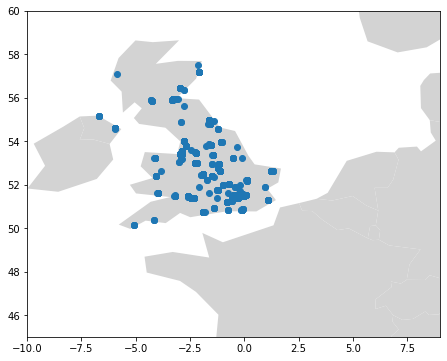

In [17]:
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize = (12, 6))
worldmap.plot(color='lightgrey', ax = ax)

gdf.plot(ax=ax)

x = list(freq_data['Longitude'])
y = list(freq_data['Latitude'])
#z = freq_data['Place']

#plt.scatter(x, y)

plt.xlim([-10, 9])
plt.ylim([45, 60])